# 环境配置

In [1]:
!pip install -U openmim
!mim install mmengine
!mim install "mmcv>=2.0.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.3/374.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 29.4 MB/s eta 0:00:00
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 3.3.0
    Uninstalling platformdirs-3.3.0:
      Successfully uninstalled platformdirs-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 9.5 MB/s eta 0:00:00


In [2]:
!git clone -b main https://github.com/open-mmlab/mmsegmentation.git
%cd mmsegmentation
!pip install -v -e .
# '-v' means verbose, or more output
# '-e' means installing a project in editable mode,
# thus any local modifications made to the code will take effect without reinstallation.

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 15117, done.
remote: Counting objects: 100% (683/683), done.
remote: Compressing objects: 100% (464/464), done.
remote: Total 15117 (delta 271), reused 421 (delta 187), pack-reused 14434
Receiving objects: 100% (15117/15117), 20.70 MiB | 16.12 MiB/s, done.
Resolving deltas: 100% (10576/10576), done.
/content/mmsegmentation
Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmsegmentation
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-y5qw3o0s/mmsegmentation.egg-info
  writing /tmp/pip-pip-egg-info-y5qw3o0s/mmsegmentation.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-y5qw3o0s/mmsegmentation.egg-info/dependency_links.txt
  writing requirements to /tmp/pip-pip-egg-info-y5qw3o0s/mmsegmentation.egg-info/requ

# 验证安装

In [3]:
!mim download mmsegmentation --config pspnet_r50-d8_4xb2-40k_cityscapes-512x1024 --dest .

processing pspnet_r50-d8_4xb2-40k_cityscapes-512x1024...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.1/187.1 MiB 34.3 MB/s eta 0:00:00
Successfully downloaded pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth to /content/mmsegmentation
Successfully dumped pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py to /content/mmsegmentation


In [4]:
!python demo/image_demo.py demo/demo.png configs/pspnet/pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth --device cuda:0 --out-file result.jpg

/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(
Loads checkpoint by local backend from path: pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
06/14 14:26:50 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


# 获取完整配置文件

In [22]:
!python tools/train.py configs/pspnet/pspnet_r50-d8_4xb2-40k_DubaiDataset.py

Traceback (most recent call last):
  File "/content/mmsegmentation/tools/train.py", line 104, in <module>
    main()
  File "/content/mmsegmentation/tools/train.py", line 58, in main
    cfg = Config.fromfile(args.config)
  File "/usr/local/lib/python3.10/dist-packages/mmengine/config/config.py", line 178, in fromfile
    cfg_dict, cfg_text, env_variables = Config._file2dict(
  File "/usr/local/lib/python3.10/dist-packages/mmengine/config/config.py", line 458, in _file2dict
    check_file_exist(filename)
  File "/usr/local/lib/python3.10/dist-packages/mmengine/utils/path.py", line 23, in check_file_exist
    raise FileNotFoundError(msg_tmpl.format(filename))
FileNotFoundError: file "/content/mmsegmentation/configs/pspnet/pspnet_r50-d8_4xb2-40k_DubaiDataset.py" does not exist


# 准备数据集

In [7]:
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/dataset/watermelon/Watermelon87_Semantic_Seg_Mask.zip

--2023-06-14 14:31:28--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/dataset/watermelon/Watermelon87_Semantic_Seg_Mask.zip
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13230222 (13M) [application/zip]
Saving to: ‘Watermelon87_Semantic_Seg_Mask.zip’

Watermelon87_Semant 100%[===================>]  12.62M  4.95MB/s    in 2.5s    

2023-06-14 14:31:32 (4.95 MB/s) - ‘Watermelon87_Semantic_Seg_Mask.zip’ saved [13230222/13230222]



In [8]:
import zipfile

# 指定ZIP文件路径
zip_path = '/content/mmsegmentation/Watermelon87_Semantic_Seg_Mask.zip'

# 指定解压目标路径
extract_path = './data/'

# 创建一个ZipFile对象
zip_file = zipfile.ZipFile(zip_path, 'r')

# 解压文件
zip_file.extractall(extract_path)

# 关闭ZipFile对象
zip_file.close()


# 修改cfg文件

In [ ]:
# Copyright (c) OpenMMLab. All rights reserved.
from mmseg.registry import DATASETS
from .basesegdataset import BaseSegDataset


@DATASETS.register_module()
class WatermelonDataset(BaseSegDataset):
    """Cityscapes dataset.

    The ``img_suffix`` is fixed to '_leftImg8bit.png' and ``seg_map_suffix`` is
    fixed to '_gtFine_labelTrainIds.png' for Cityscapes dataset.
    """
    METAINFO = dict(
        classes=('red_flesh', 'shell', 'white_rind', 'black_seed', 'white_seeds'),
        palette=[[128, 64, 128], [244, 35, 232], [70, 70, 70], [102, 102, 156],
                 [190, 153, 153]])

    def __init__(self,
                 img_suffix='.jpg',
                 seg_map_suffix='.png',
                 **kwargs) -> None:
        super().__init__(
            img_suffix=img_suffix, seg_map_suffix=seg_map_suffix, **kwargs)


In [ ]:
norm_cfg = dict(type='BN', requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[123.675, 116.28, 103.53],
    std=[58.395, 57.12, 57.375],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(256, 256))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(256, 256)),
    pretrained='open-mmlab://resnet50_v1c',
    backbone=dict(
        type='ResNetV1c',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        dilations=(1, 1, 2, 4),
        strides=(1, 2, 1, 1),
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=False,
        style='pytorch',
        contract_dilation=True),
    decode_head=dict(
        type='PSPHead',
        in_channels=2048,
        in_index=3,
        channels=512,
        pool_scales=(1, 2, 3, 6),
        dropout_ratio=0.1,
        num_classes=6,
        norm_cfg=dict(type='BN', requires_grad=True),
        align_corners=False,
        loss_decode=dict(
            type='CrossEntropyLoss', use_sigmoid=False, loss_weight=1.0)),
    auxiliary_head=dict(
        type='FCNHead',
        in_channels=1024,
        in_index=2,
        channels=256,
        num_convs=1,
        concat_input=False,
        dropout_ratio=0.1,
        num_classes=6,
        norm_cfg=dict(type='BN', requires_grad=True),
        align_corners=False,
        loss_decode=dict(
            type='CrossEntropyLoss', use_sigmoid=False, loss_weight=0.4)),
    train_cfg=dict(),
    test_cfg=dict(mode='whole'))
dataset_type = 'WatermelonDataset'
data_root = 'data/Watermelon87_Semantic_Seg_Mask/'
crop_size = (256, 256)
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(
        type='RandomResize',
        scale=(2048, 1024),
        ratio_range=(0.5, 2.0),
        keep_ratio=True),
    dict(type='RandomCrop', crop_size=(64, 64), cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PhotoMetricDistortion'),
    dict(type='PackSegInputs')
]
test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', scale=(2048, 1024), keep_ratio=True),
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]
img_ratios = [0.5, 0.75, 1.0, 1.25, 1.5, 1.75]
tta_pipeline = [
    dict(type='LoadImageFromFile', file_client_args=dict(backend='disk')),
    dict(
        type='TestTimeAug',
        transforms=[[{
            'type': 'Resize',
            'scale_factor': 0.5,
            'keep_ratio': True
        }, {
            'type': 'Resize',
            'scale_factor': 0.75,
            'keep_ratio': True
        }, {
            'type': 'Resize',
            'scale_factor': 1.0,
            'keep_ratio': True
        }, {
            'type': 'Resize',
            'scale_factor': 1.25,
            'keep_ratio': True
        }, {
            'type': 'Resize',
            'scale_factor': 1.5,
            'keep_ratio': True
        }, {
            'type': 'Resize',
            'scale_factor': 1.75,
            'keep_ratio': True
        }],
                    [{
                        'type': 'RandomFlip',
                        'prob': 0.0,
                        'direction': 'horizontal'
                    }, {
                        'type': 'RandomFlip',
                        'prob': 1.0,
                        'direction': 'horizontal'
                    }], [{
                        'type': 'LoadAnnotations'
                    }], [{
                        'type': 'PackSegInputs'
                    }]])
]
train_dataloader = dict(
    batch_size=8,
    num_workers=2,
    persistent_workers=True,
    sampler=dict(type='InfiniteSampler', shuffle=True),
    dataset=dict(
        type='WatermelonDataset',
        data_root='data/Watermelon87_Semantic_Seg_Mask/',
        data_prefix=dict(
            img_path='img_dir/train', seg_map_path='ann_dir/train'),
        pipeline=[
            dict(type='LoadImageFromFile'),
            dict(type='LoadAnnotations'),
            dict(
                type='RandomResize',
                scale=(2048, 1024),
                ratio_range=(0.5, 2.0),
                keep_ratio=True),
            dict(type='RandomCrop', crop_size=(64, 64), cat_max_ratio=0.75),
            dict(type='RandomFlip', prob=0.5),
            dict(type='PhotoMetricDistortion'),
            dict(type='PackSegInputs')
        ]))
val_dataloader = dict(
    batch_size=1,
    num_workers=4,
    persistent_workers=True,
    sampler=dict(type='DefaultSampler', shuffle=False),
    dataset=dict(
        type='WatermelonDataset',
        data_root='data/Watermelon87_Semantic_Seg_Mask/',
        data_prefix=dict(img_path='img_dir/val', seg_map_path='ann_dir/val'),
        pipeline=[
            dict(type='LoadImageFromFile'),
            dict(type='Resize', scale=(2048, 1024), keep_ratio=True),
            dict(type='LoadAnnotations'),
            dict(type='PackSegInputs')
        ]))
test_dataloader = dict(
    batch_size=1,
    num_workers=4,
    persistent_workers=True,
    sampler=dict(type='DefaultSampler', shuffle=False),
    dataset=dict(
        type='WatermelonDataset',
        data_root='data/Watermelon87_Semantic_Seg_Mask/',
        data_prefix=dict(img_path='img_dir/val', seg_map_path='ann_dir/val'),
        pipeline=[
            dict(type='LoadImageFromFile'),
            dict(type='Resize', scale=(2048, 1024), keep_ratio=True),
            dict(type='LoadAnnotations'),
            dict(type='PackSegInputs')
        ]))
val_evaluator = dict(type='IoUMetric', iou_metrics=['mIoU'])
test_evaluator = dict(type='IoUMetric', iou_metrics=['mIoU'])
default_scope = 'mmseg'
env_cfg = dict(
    cudnn_benchmark=True,
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0),
    dist_cfg=dict(backend='nccl'))
vis_backends = [dict(type='LocalVisBackend')]
visualizer = dict(
    type='SegLocalVisualizer',
    vis_backends=[dict(type='LocalVisBackend')],
    name='visualizer')
log_processor = dict(by_epoch=False)
log_level = 'INFO'
load_from = None
resume = False
tta_model = dict(type='SegTTAModel')
optimizer = dict(type='SGD', lr=0.01, momentum=0.9, weight_decay=0.0005)
optim_wrapper = dict(
    type='OptimWrapper',
    optimizer=dict(type='SGD', lr=0.01, momentum=0.9, weight_decay=0.0005),
    clip_grad=None)
param_scheduler = [
    dict(
        type='PolyLR',
        eta_min=0.0001,
        power=0.9,
        begin=0,
        end=40000,
        by_epoch=False)
]
train_cfg = dict(type='IterBasedTrainLoop', max_iters=3000, val_interval=400)
val_cfg = dict(type='ValLoop')
test_cfg = dict(type='TestLoop')
default_hooks = dict(
    timer=dict(type='IterTimerHook'),
    logger=dict(type='LoggerHook', interval=100, log_metric_by_epoch=False),
    param_scheduler=dict(type='ParamSchedulerHook'),
    checkpoint=dict(type='CheckpointHook', by_epoch=False, interval=1500),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    visualization=dict(type='SegVisualizationHook'))
randomness = dict(seed=0)
work_dir = './work_dirs/DubaiDataset'

In [26]:
!python tools/train.py /content/mmsegmentation/cfg.py

06/14 15:58:42 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_

# 模型测试

In [27]:
import requests
from PIL import Image
from io import BytesIO

url = "https://p9.itc.cn/q_70/images03/20230614/d7c96d1cf185436098db0bde886de974.jpeg" # 替换为你想要下载的图像的URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.save("image.jpg")

In [28]:
!python demo/image_demo.py image.jpg /content/mmsegmentation/cfg.py /content/mmsegmentation/work_dirs/DubaiDataset/iter_17.pth --device cuda:0 --out-file result.jpg

/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(
Loads checkpoint by local backend from path: /content/mmsegmentation/work_dirs/DubaiDataset/iter_17.pth
06/14 16:08:18 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


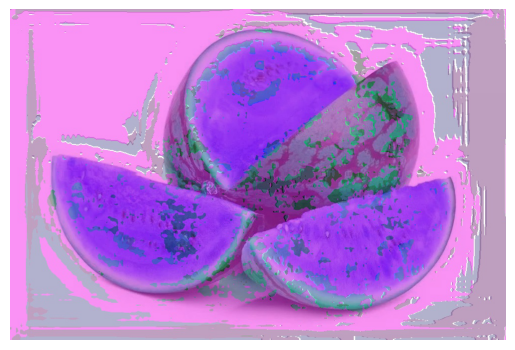

In [29]:
import matplotlib.pyplot as plt
from PIL import Image

# 加载图像
img = Image.open("/content/mmsegmentation/result.jpg")

# 创建一个图像窗口
fig, ax = plt.subplots()

# 显示图像
ax.imshow(img)

# 隐藏坐标轴
ax.axis('off')

# 显示窗口
plt.show()